# Table of Contents

* [Data Sources](#Data-Sources)
* [Gather the Data](#Gather-the-Data)
* [Explore the Data](#Explore-the-Data)
    * [Merge the titleBasics and titleRatings Data](#Merge-the-titleBasics-and-titleRatings-Data)
    * [Explore titleType From titleBasics](#Explore-titleType-From-titleBasics)
    * [Explore Rows with Null Data](#Explore-Rows-with-Null-Data)
    * [Determine What Timeframe to Include](#Determine-What-Timeframe-to-Include)
    * [Determine What Genres to Include](#Determine-What-Genres-to-Include)
    * [Determine the Target Average Rating](#Determine-the-Target-Average-Rating)
* [Model the Data](#Model-the-Data)
    * [Building a Decision Tree](#Building-a-Decision-Tree)
    * [Building a Random Forest Model](#Building-a-Random-Forest-Model)
* [Visualize the Results](#Visualize-the-Results)


<hr>

## Data Sources

Description of the IMDB data: https://www.imdb.com/interfaces/

IMDB Data Sources: https://datasets.imdbws.com/

<hr>

## Gather the Data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
from scipy import stats
from scipy.stats import norm

In [3]:
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

In [4]:
# display imdb documentation in the notebook
from IPython.display import IFrame
IFrame("../IMDB Dataset Descriptions.pdf", 800, 600)

In [5]:
# display imdb ER Diagram in the notebook
from IPython.display import IFrame
IFrame("../../Presentation/IMDB ERD.pdf", 800, 600)

In [6]:
#===============================================================================
#     READ INPUT DATA
#===============================================================================

#--------------------------------------------------------
#--  Input File 1:  name.basics.tsv
#--------------------------------------------------------
#print('Reading name.basics.tsv')
#nameBasics = pd.read_csv("../Data/name.basics.tsv/data.tsv", sep='\t')
#print('Complete - 1 of 7')
#print(nameBasics.head(5))

#--------------------------------------------------------
#--  Input File 2:  title.akas.tsv
#--------------------------------------------------------
#print('Reading title.akas.tsv')
#titleAkas = pd.read_csv("../Data/title.akas.tsv/data.tsv", sep='\t',dtype={"titleId": object, "ordering": object, "title": object, "region": object, "language": object, "types": object, "attributes": object, "isOriginalTitle": object})
#print('Complete - 2 of 7')
#print(titleAkas.head(5))

#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("../Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
#print('Complete - 3 of 7')
titleBasics = titleBasics[titleBasics.isAdult == "0"]
print(titleBasics.head(5))

#--------------------------------------------------------
#--  Input File 4:  title.crew.tsv
#--------------------------------------------------------
#print('Reading title.crew.tsv')
#titleCrew = pd.read_csv("../Data/title.crew.tsv/data.tsv", sep='\t')
#print('Complete - 4 of 7')
#print(titleCrew.head(5))

#--------------------------------------------------------
#--  Input File 5:  title.episode.tsv
#--------------------------------------------------------
#print('Reading title.episode.tsv')
#titleEpisode = pd.read_csv("../Data/title.episode.tsv/data.tsv", sep='\t')
#print('Complete - 5 of 7')
#print(titleEpisode.head(5))

#--------------------------------------------------------
#--  Input File 6:  title.principals.tsv
#--------------------------------------------------------
#print('Reading title.principals.tsv')
#titlePrincipals = pd.read_csv("../Data/title.principals.tsv/data.tsv", sep='\t')
#print('Complete - 6 of 7')
#print(titlePrincipals.head(5))

#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("../Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('CompletitleRatingste - 7 of 7')
print(titleRatings.head(5))

print('\n-----all data loaded -----')

Reading title.basics.tsv
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             \N           Animation,Short  
4       0      1893      \N              1                     Short  
Reading title.ratings.tsv
CompletitleRatingste - 7 of 7
      tconst  averageRating  numVotes
0  tt00000

<hr>

## Explore the Data

In [7]:
titleBasics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,4995016,4995016,4995010,4995010,4995016,4995016,4995016,4995016,4995016
unique,4995016,10,2592549,2606278,1,146,94,776,2080
top,tt1898405,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,\N
freq,1,3413257,28808,28814,4995016,292947,4954210,3465520,406668


In [8]:
titleRatings.describe()

,averageRating,numVotes
count,852306.000000,8.523060e+05
mean,6.929305,9.783524e+02
std,1.395433,1.537121e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,1.974184e+06


In [9]:
len(titleBasics) - len(titleRatings)

4142710

The titleBasics table has 4153738 more rows than the titleRatings table. 

Will need to look at removing NaN were appropriate and get a subset of data that contains only movies.

<hr>

### Merge the titleBasics and titleRatings Data

No need to rename columns as the column names are already consistent and have a way to join naturally using the `tconst` column.

Use of the pandas database-style [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) function.

In [10]:
# returns an inner join of both dataframes
title_data = pd.merge(titleBasics, titleRatings, how='inner', on=['tconst'])

# Check the length of the resulting join
len(title_data)

835236

In [11]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1391
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,979
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1673


<hr>

### Explore titleType From titleBasics

In [13]:
title_data.titleType.value_counts()

tvEpisode       356931
movie           217354
short           102739
tvSeries         58110
tvMovie          42220
video            32514
videoGame         8551
tvMiniSeries      8045
tvSpecial         6353
tvShort           2419
Name: titleType, dtype: int64

TitleTypes to include:
- movie

TitleTypes to consider (similar to movies, these have one runtime with no endYear value):
- short, tvMovie, video, tvSpecial, tvShort

Apply a mask that removes all title types that are not `movies`, then save the results to a new dataframe. Next remove unused columns that contain all NaN or null values.

In [20]:
# remove all titleTypes except for movies
movie_data = title_data[title_data.titleType == 'movie']

# drop unused columns
movie_data = movie_data.drop(['titleType', 'isAdult', 'endYear'], axis=1)

movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67
142,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259
235,tt0000335,Soldiers of the Cross,Soldiers of the Cross,1900,\N,"Biography,Drama",6.2,35
337,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,463
353,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,5.1,13


<hr>

### Explore Rows with Null Data

Next will explore rows with null data and will need to decide if they should be included in the final dataset. As well as explore the datatypes of rows with numerical data.

To convert the `startYear` type from an Object to an Int datatype, we need to fill all NaN rows with zero. This allows for the columns to be used in calculations and charts.

**Decision:** Since there are less than 5 rows that do not have a start year, we will remove all '0' values from this column.

In [26]:
# replace values with '\N' with the pandas 'NaN'
# source: https://stackoverflow.com/a/49406417
movie_data = movie_data.replace({'\\N': np.nan})

# fill NaN rows with 0
movie_data['startYear'] = movie_data.startYear.fillna(0)

# convert the column to datatype of int
movie_data['startYear'] = movie_data.startYear.astype(int)

# drop the rows that contain a startYear of 0
# source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
movie_data = movie_data[movie_data.startYear != 0]

In [25]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                0
primaryTitle          0
originalTitle         1
startYear             2
runtimeMinutes    27289
genres            13553
averageRating         0
numVotes              0
dtype: int64

The `runtimMinutes` is currently the only column that is an object but may consider turning to a type of int.

**Decision Needed:** Convert the 27,335 NaN values to 0?

**Decision Needed:** Should the NaN/0 values remain in the final cleaned dataset?

In [28]:
# fill NaN rows with 0
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.fillna(0)

# convert the column to datatype of int
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.astype(int)

In [29]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                0
primaryTitle          0
originalTitle         1
startYear             0
runtimeMinutes        0
genres            13553
averageRating         0
numVotes              0
dtype: int64

<hr>

### Determine What Timeframe to Include

Why limit the timeframe? Movies release before a certain period of time are not being reviewed as they are release, where many of the reviews may come from viewers watching the movie(s) years after the initial release. For example, the data from IMDB would not have reviews from the year 1894, the same year the movie was released. 

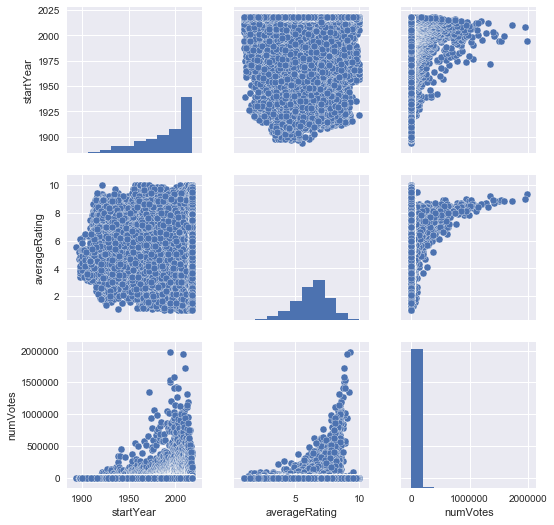

In [30]:
sns.pairplot(data=movie_data[['startYear', 'averageRating', 'numVotes']])

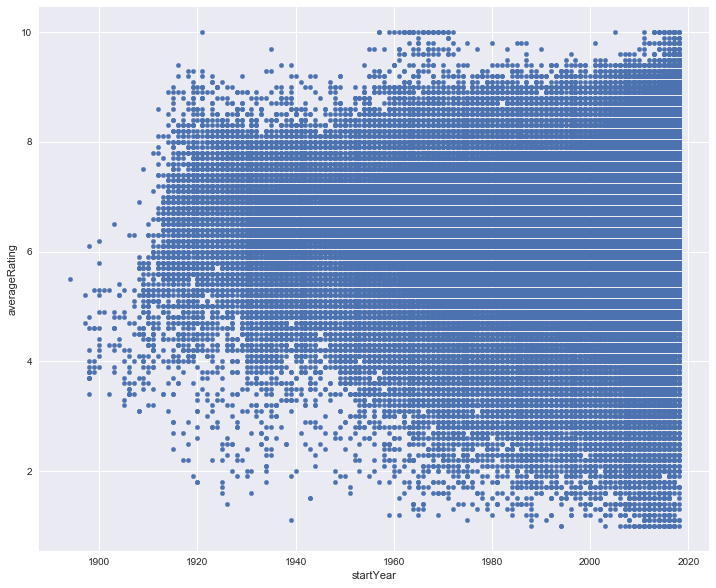

In [31]:
movie_data.plot.scatter(x="startYear", y="averageRating")

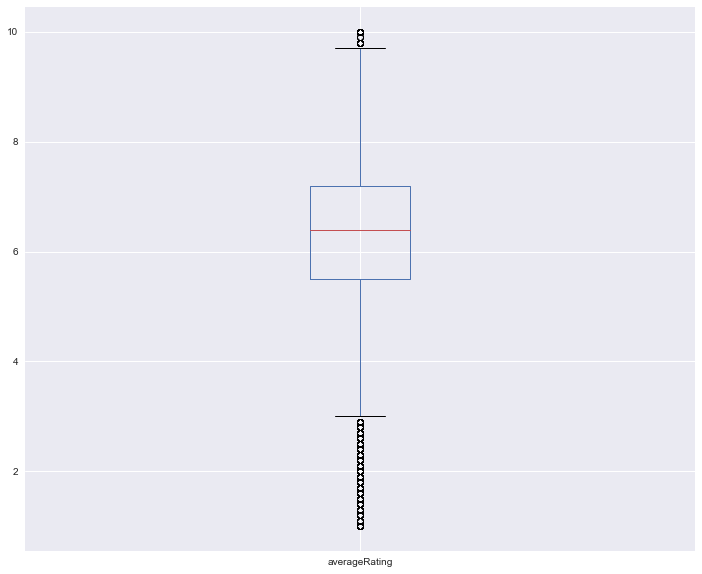

In [32]:
movie_data.averageRating.plot(kind='box')

Calculate the thresholds for the outliers.

In [33]:
q1 = movie_data.averageRating.quantile(0.25)  # first quartile
q3 = movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.9499999999999997

9.75

Pivot table that looks at the average movie rating for each year.

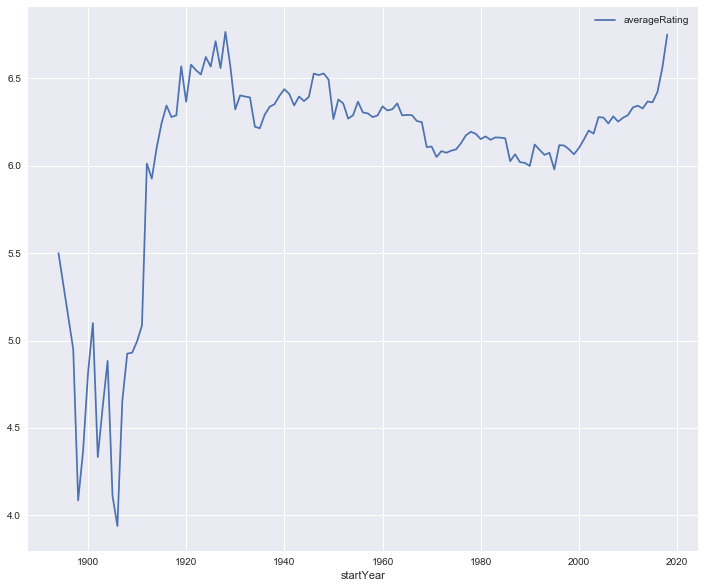

In [34]:
movie_pivot = movie_data.pivot_table(index="startYear", 
                       values=["averageRating"])

movie_pivot.plot(kind='line')

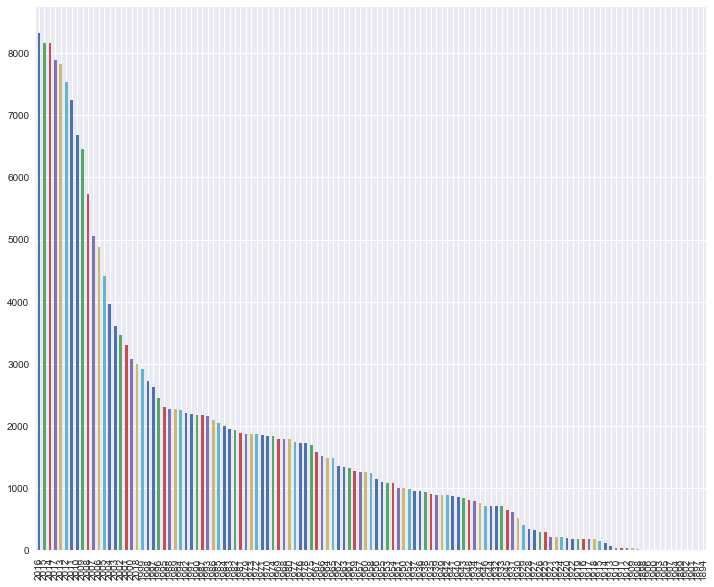

In [35]:
# plot the number of movie reviews per year
movie_pivot = movie_data['startYear'].value_counts()

movie_pivot.plot(kind='bar')

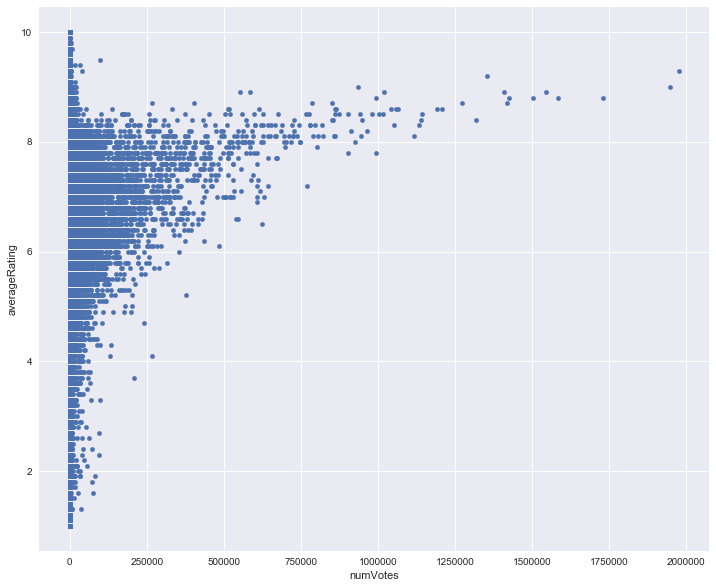

In [36]:
movie_data.plot.scatter(x="numVotes", y="averageRating")

It appears the general trend is that average movie ratings increases each year sometime after the year 2000. Should explore reasons why. Could be movie saturation?

This dataset also shows at first glance that the more votes a movie receives, the better the average rating. Similar concept to if the movie is bad, you may see primarily negative reviews.

IMDB was established in 1990.

**Decision:** Analyze movies that occur on or after the year 1980.

In [37]:
current_movie_data = movie_data[movie_data.startYear >= 1980]

In [38]:
current_movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
3426,tt0015724,Dama de noche,Dama de noche,1993,102,"Drama,Mystery,Romance",6.4,18
6887,tt0023331,Pesn o geroyakh,Pesn o geroyakh,1983,50,Documentary,6.8,66
15912,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,71496
16858,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,Drama,6.6,209
33742,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,NaN,4.1,10


In [39]:
len(current_movie_data)

153128

There's a fractionally larger threshold after narrowing down the startYear.

In [40]:
q1 = current_movie_data.averageRating.quantile(0.25)  # first quartile
q3 = current_movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.7000000000000006

9.9

Can infer movie saturation may be the cause for the trend of positive movie ratings.

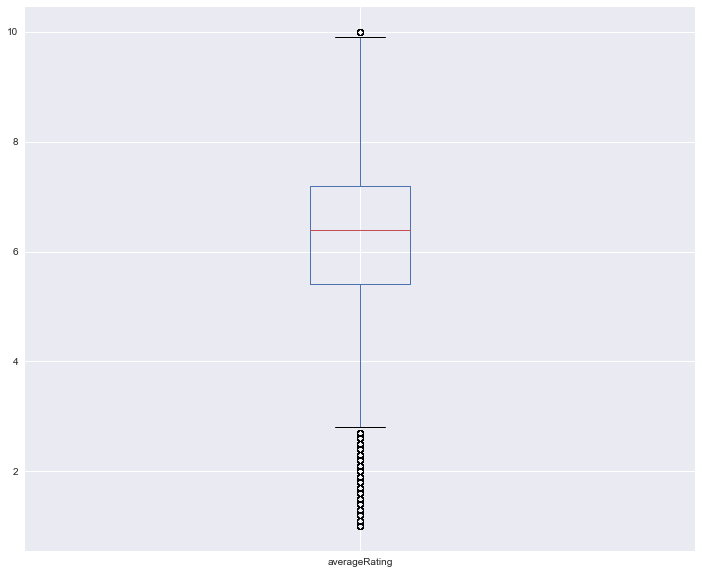

In [41]:
current_movie_data.averageRating.plot(kind='box')

<hr>

### Determine What Genres to Include

Currently all genres for a movie title are comma separated into one column. Next will [Tidy the Data](https://www.jstatsoft.org/article/view/v059i10) by separating each genre into it's own column with a boolean value.

In [42]:
# Used for Proof of Concept
#current_movie_data.to_csv("../Data/current_movie_data.csv", sep='\t', index=False)

In [43]:
movies_genres_list = current_movie_data['genres'].tolist()

# convert all values to a string and return the map as a list
# source: https://stackoverflow.com/a/1303354
movies_genres_list = list(map(str, movies_genres_list))

#movies_genres_list

In [44]:
def get_genres(comma_list):
    '''Returns a sorted list of genres from the dataset'''
    genre_dict = dict()  # { key='genre': val='count' }
    genre_list = list()
    
    for index, val in enumerate(comma_list):
        # create a list of lists for each movie entry
        split_list = comma_list[index].split(',')
        
        # store each genre as one entry in the dictionary
        for index, val in enumerate(split_list):
            genre_dict[val] = genre_dict.get(val, 0) + 1
    
    return convert_dict_to_string(genre_dict)


def convert_dict_to_string(dictionary):
    '''Sorts a dictionary into a list of sorted keys'''
    sortedList = list()
    
    # Create a list of keys
    for key, val in dictionary.items():
        sortedList.append(key)
    
    sortedList.sort()
    
    return sortedList


genres_list = get_genres(movies_genres_list)

In [45]:
# create a new subset of data for when we explode the genre columns
movie_data_expanded = current_movie_data.copy()

# convert the NaN values to a string so they are not a float value & throw an error
movie_data_expanded['genres'] = movie_data_expanded.genres.fillna('')

In [46]:
def find_Value(value, subString):
    '''Returns 1 if True, 0 otherwise'''
    if subString in value:
        return 1
    else:
        return 0

def split_genre_columns(list_of_genres):
    '''Explodes the genres column where there is one new column for each genre in the dataset.
       Each new column has a True/False value that corresponds to the genres column.'''
    print('Number of genres:', len(list_of_genres))
    for index, val in enumerate(list_of_genres):
        print(list_of_genres[index])
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded.apply(lambda x: find_Value(x['genres'], list_of_genres[index]), axis=1)
        
        # convert the column to datatype of integer
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded[list_of_genres[index]].astype(int)
        #movie_data_expanded[list_of_genres[index]].str.strip()  # needed if converting to True/False values
        
split_genre_columns(genres_list)  #explode the genre columns
movie_data_expanded.head()

Number of genres: 28
Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Game-Show
History
Horror
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western
nan


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
3426,tt0015724,Dama de noche,Dama de noche,1993,102,"Drama,Mystery,Romance",6.4,18,0,0,...,0,1,0,0,0,0,0,0,0,0
6887,tt0023331,Pesn o geroyakh,Pesn o geroyakh,1983,50,Documentary,6.8,66,0,0,...,0,0,0,0,0,0,0,0,0,0
15912,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,71496,0,0,...,0,1,0,0,0,0,0,0,0,0
16858,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118,Drama,6.6,209,0,0,...,0,0,0,0,0,0,0,0,0,0
33742,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,,4.1,10,0,0,...,0,0,0,0,0,0,0,0,0,0


Need to explore why there are certain genres in the dataset such as Adult (filter this out previously), Game-Show, Reality-TV, Short, and Talk-Show.

In [47]:
movie_data_expanded.nan.unique()

array([0], dtype=int64)

**Decision Needed:** Could keep or remove the `nan` column from the resulting genre list. If kept, it would need to be updated to be `True` for everywhere there is a `''` value in the `genres` column.

In [48]:
# source: https://stackoverflow.com/a/19226617
movie_data_expanded.loc[movie_data_expanded.genres == '', 'nan'] = 1

In [49]:
# double check the same number of null values exist as before
movie_data_expanded[movie_data_expanded.genres == ''].genres.value_counts()

    8285
Name: genres, dtype: int64

In [50]:
movie_data_expanded.nan.value_counts()

0    144843
1      8285
Name: nan, dtype: int64

In [51]:
movie_data_expanded[movie_data_expanded.nan == 1].head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
33742,tt0057461,La rosa de los vientos,La rosa de los vientos,1983,84,,4.1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
48418,tt0074994,Tempyo no iraka,Tempyo no iraka,1980,120,,6.2,8,0,0,...,0,0,0,0,0,0,0,0,0,1
49492,tt0076322,Llocsi caimanta,Llocsi caimanta,1981,100,,6.6,7,0,0,...,0,0,0,0,0,0,0,0,0,1
50158,tt0077133,Ai yu kuang chao,Ai yu kuang chao,1982,92,,5.2,5,0,0,...,0,0,0,0,0,0,0,0,0,1
50352,tt0077367,Consultorio sexológico,Consultorio sexológico,1980,0,,5.6,7,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Determine Stats For Each Genre

In [52]:
#genres_series = pd.Series(genres_list, name='genres')

genre_avg = pd.DataFrame(columns = ['genre', 'averageRating', 'max', 'min', 'count', 'stdDev', 'numVotes', 'avgRuntimeMinutes'])

In [53]:
def calc_genre_avgs(list_genres):
    '''Populate an empty dataframe with calculated values for all genres in the dataset'''
    for index, val in enumerate(list_genres):
        # mask all data for the current genre
        genreData_temp = movie_data_expanded[movie_data_expanded[list_genres[index]] == 1]
        
        genre_avg.loc[index] = [list_genres[index], genreData_temp.averageRating.mean(), genreData_temp.averageRating.max(), 
                                genreData_temp.averageRating.min(), genreData_temp.averageRating.count(),
                                genreData_temp.averageRating.std(ddof=1), genreData_temp.numVotes.mean(),
                                genreData_temp.runtimeMinutes.mean()]

calc_genre_avgs(genres_list)
genre_avg

,genre,averageRating,max,min,count,stdDev,numVotes,avgRuntimeMinutes
0,Action,5.700898,9.8,1.0,16586,1.425514,11827.014892,88.832509
1,Adult,5.272727,6.7,3.3,11,1.212511,22.636364,70.181818
2,Adventure,6.059052,10.0,1.0,7407,1.446082,23301.971243,89.541110
3,Animation,6.396940,9.4,1.1,3137,1.203562,11757.530124,76.770800
4,Biography,7.137872,10.0,1.1,5281,1.060441,7308.795493,90.235940
5,Comedy,5.969918,9.8,1.0,37773,1.345099,5036.064914,85.498028
6,Crime,6.048905,10.0,1.1,11369,1.276896,10661.637875,92.675609
7,Documentary,7.336636,10.0,1.0,27287,1.085108,283.965405,75.918716
8,Drama,6.354991,10.0,1.0,64994,1.228072,4678.570883,90.663738
9,Family,6.272111,10.0,1.0,6221,1.360123,5056.716444,85.000643


Could also consider using the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function.

In [54]:
movie_data_expanded.groupby(['Action'])['averageRating'].mean()

Action
0    6.327559
1    5.700898
Name: averageRating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002725D656240>,
      dtype=object)

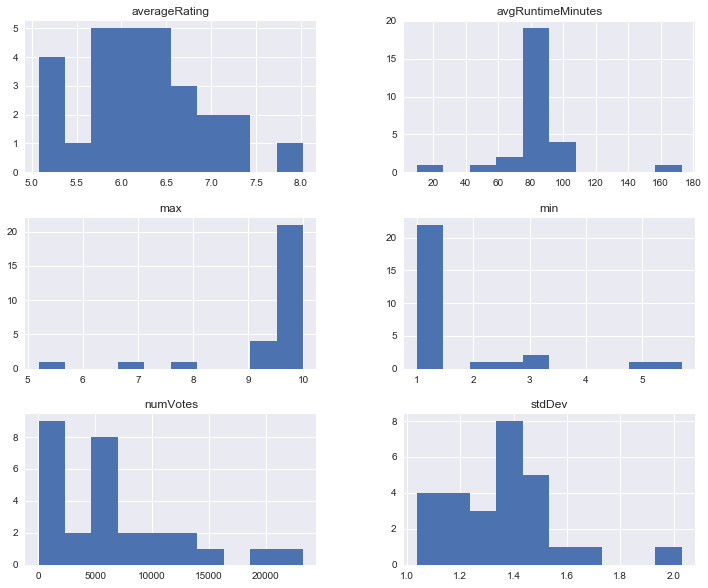

In [55]:
genre_avg.hist()

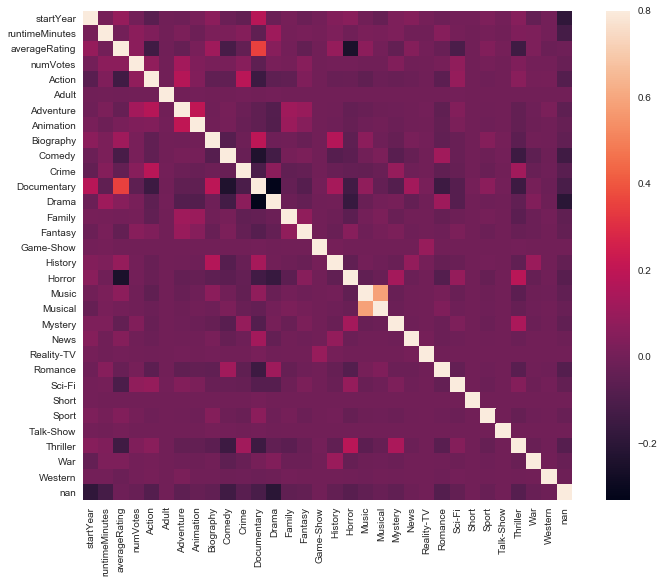

In [56]:
# correlation matrix
corrmatrix = movie_data_expanded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=0.8, square=True)

In [57]:
#columns = [genres_series, 'averageRating', 'numVotes', 'runtimeMinutes']

#genre_avg = pd.DataFrame

#movie_data_expanded[movie_data_expanded.Action == 'True'].head()

May also want to look into how well movies performed by region. Would need to use the title.akas.tsv file to analyze this.

Save cleaned data to a csv for later analysis in another notebook.

In [58]:
genre_avg.to_csv("../Data/genre_avg_data.csv", sep='\t', index=False)
movie_data_expanded.to_csv("../Data/movie_data_expanded.csv", sep='\t', index=False)

In [59]:
# save a skinny table for the "Crew Analysis" workbook
columns = ['tconst', 'startYear']

movie_data_years = pd.DataFrame(movie_data_expanded[columns]).copy(deep=True)

movie_data_years.to_csv("../Data/movie_data_years.csv", sep='\t', index=False)

<hr>

### Determine the Target Average Rating

Pandas [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) method and [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) guide for reference.

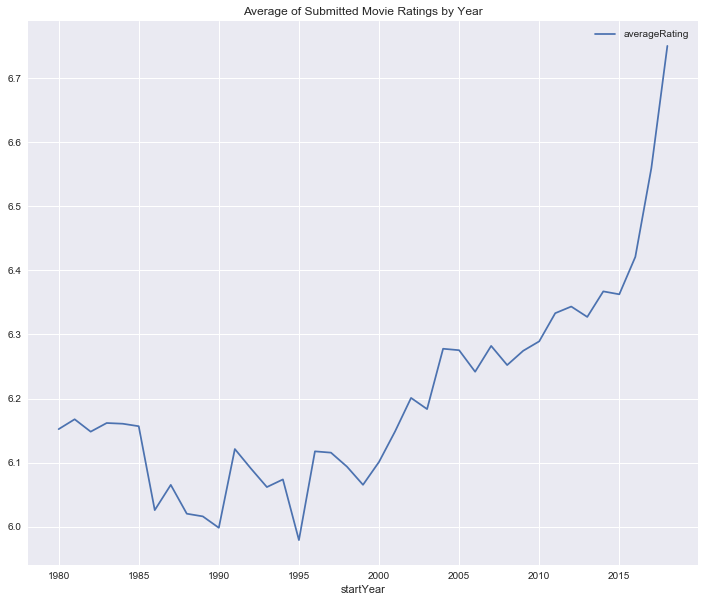

In [60]:
# plot the average movie rating by year
movie_pivot = current_movie_data.pivot_table(index="startYear", 
                       values=["averageRating"])

movie_pivot.plot(kind='line', title='Average of Submitted Movie Ratings by Year')

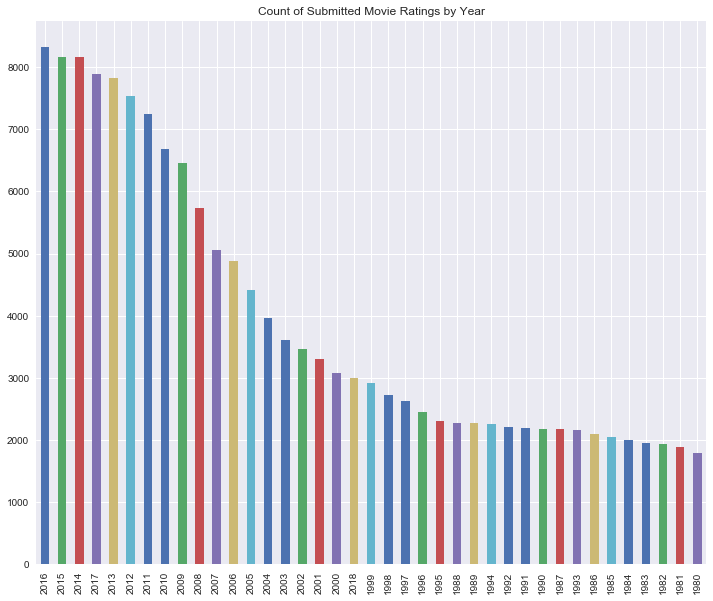

In [61]:
# plot the number of movie reviews per year
movie_pivot = current_movie_data['startYear'].value_counts()

movie_pivot.plot(kind='bar', title='Count of Submitted Movie Ratings by Year')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text xticklabel objects>)

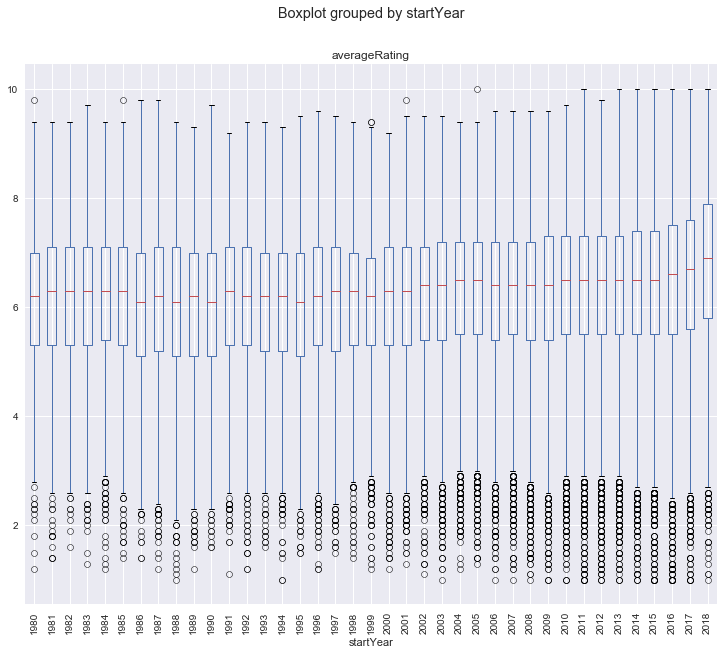

In [62]:
current_movie_data.boxplot(column='averageRating', by='startYear')
plt.xticks(rotation=90)

Plot the Density or kernel density estimation (KDE) of the average ratings by year to estimate the probability density function (PDF) using the [`.plot.kde()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html) DataFrame method.

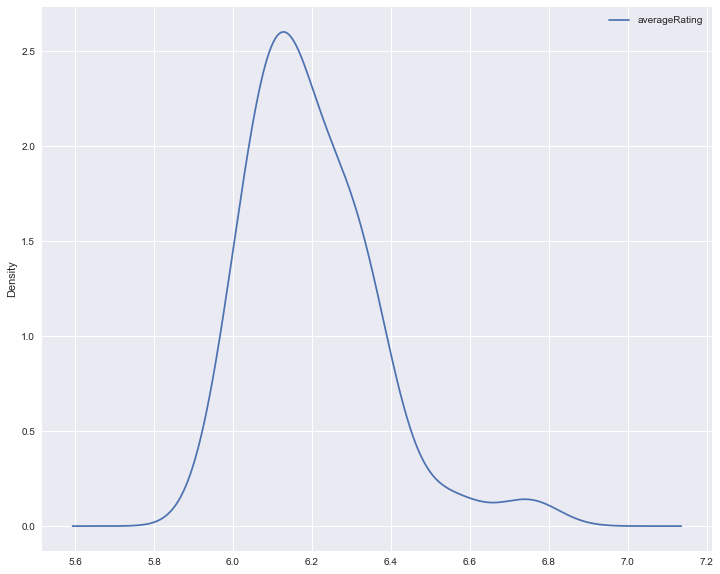

In [63]:
# create a Series of the average movie rating by year
movie_pivot = current_movie_data.pivot_table(index="startYear", values=["averageRating"])

# plot the Density or (KDE)
movie_pivot.plot.kde()

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


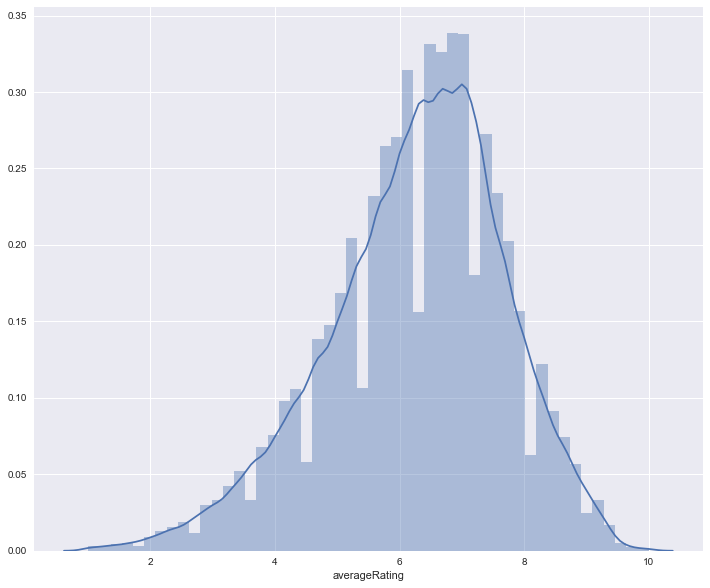

In [64]:
sns.distplot(current_movie_data['averageRating'])

References from the Kaggle Notebook [Comprehensive Data Exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


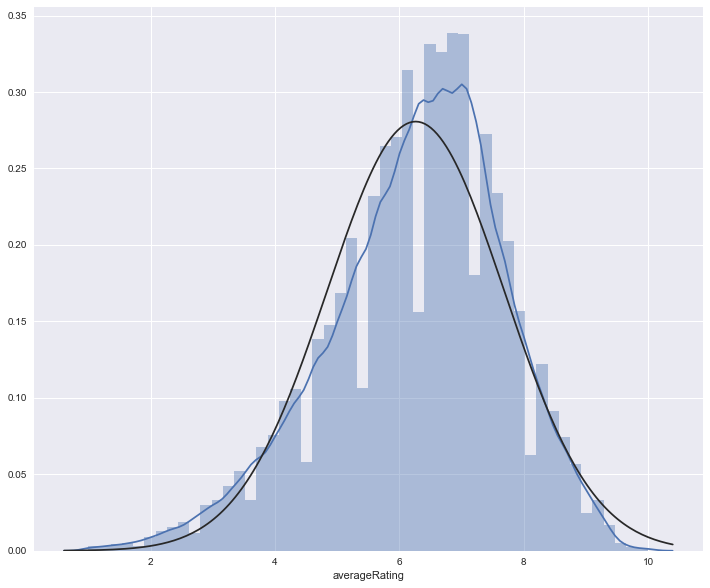

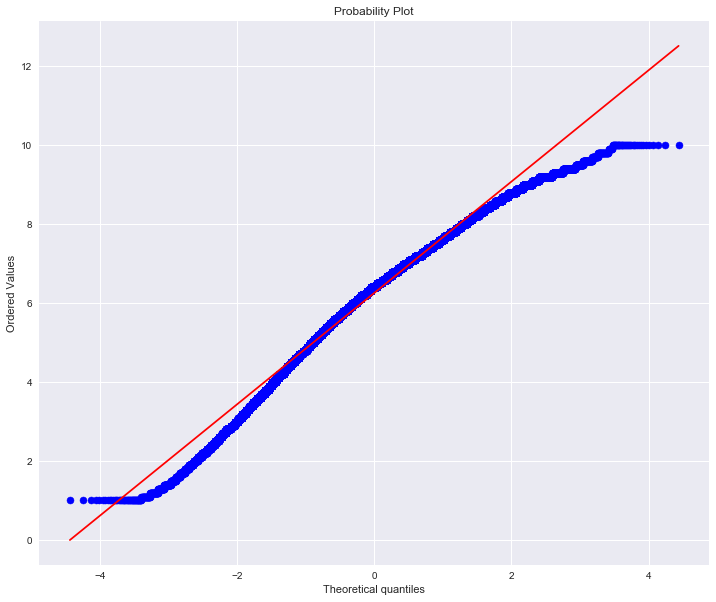

In [65]:
# test the normality of averageRating (should look like a normal distribution)
# histogram & normal probability plot
sns.distplot(current_movie_data['averageRating'], fit=norm)
fig = plt.figure()
res = stats.probplot(current_movie_data['averageRating'], plot=plt)

In [66]:
q1 = movie_pivot.averageRating.quantile(0.25)  # first quartile
q3 = movie_pivot.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

5.810829394133809

6.561356826699719

Next will look at the stats for the `averageRating` and plot a histogram of the quantiles to determine if we can define/prove what a high rating movie is. The below uses the "[Happy Healthy Hungry -- San Francisco](http://nbviewer.jupyter.org/github/Jay-Oh-eN/happy-healthy-hungry/blob/master/h3.ipynb)" notebook analysis as reference.

In [67]:
ratings = current_movie_data['averageRating']
ratings_mean = ratings.mean()
ratings_median = ratings.median()

# compute descriptive summary stats of the movie ratings
ratings_summary = ratings.describe()

ratings_mode = sp.stats.mode(ratings)
skew = ratings.skew()
kurt = ratings.kurt()

# compute quantiles
ninety = ratings.quantile(0.9)
eighty = ratings.quantile(0.8)
seventy = ratings.quantile(0.7)
sixty = ratings.quantile(0.6)

print('Skew: ', str(skew))
print('Kurtosis: ', str(kurt))
print('90%: ', str(ninety))
print('80%: ', str(eighty))
print('70%: ', str(seventy))
print('60%: ', str(sixty))
print(ratings_summary)

Skew:  -0.4884555260251529
Kurtosis:  0.19530981527267421
90%:  8.0
80%:  7.4
70%:  7.1
60%:  6.7
count    153128.000000
mean          6.259682
std           1.421510
min           1.000000
25%           5.400000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


count    153128.000000
mean          6.259682
std           1.421510
min           1.000000
25%           5.400000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


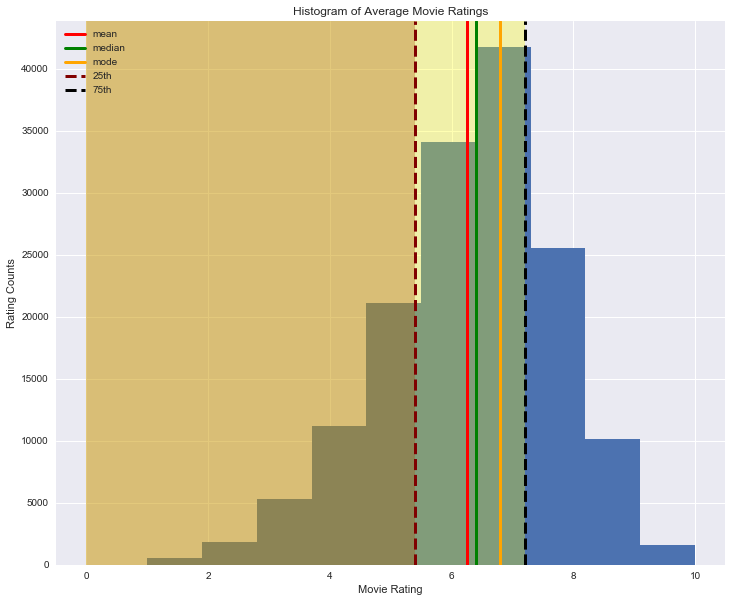

In [68]:
# histogram
h = current_movie_data['averageRating'].hist(bins=10)

# summary statistics vertical lines
h.axvline(x=ratings_mean, color='red', ls='solid', lw='3', label='mean')
h.axvline(x=ratings_median, color='green', ls='solid', lw='3', label='median')
h.axvline(x=ratings_mode[0][0], color='orange', ls='solid', lw='3', label='mode')

# 25th quantile
h.axvline(x=ratings_summary['25%'], color='maroon', ls='dashed', lw='3', label='25th')
h.axvspan(0, ratings_summary['25%'], facecolor='maroon', alpha=0.3)

# 75th quantile
h.axvline(x=ratings_summary['75%'], color='black', ls='dashed', lw='3', label='75th')
h.axvspan(0, ratings_summary['75%'], facecolor='yellow', alpha=0.3)

# add legend to graph
h.legend(loc=2)

# add a title to the figure
h.set_title('Histogram of Average Movie Ratings')

# set axis labels
h.set_xlabel('Movie Rating')
h.set_ylabel('Rating Counts')

print(ratings_summary)

**Defining High Rated movie with a rating of 8.** Why? The 90% quantile is a rating of 8.

First, we will create a new column in our dataframe that identifies all high rated movies, as defined above.

In [69]:
# create new column for new variable
movie_data_expanded['highRating'] = pd.Series(len(movie_data_expanded['averageRating']), index=movie_data_expanded.index)

# default new column to 0
movie_data_expanded['highRating'] = 0

# 1 if avg rating 8 or more; 0 if avg rating < 8
movie_data_expanded.loc[movie_data_expanded['averageRating'] >= 8, 'highRating'] = 1

In [70]:
movie_data_expanded.highRating.value_counts()

0    137346
1     15782
Name: highRating, dtype: int64

<hr>

## Model the Data

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#### Create Train & Test Datasets

Create a test and train dataset. Movies in the year 2018 will be the test dataset, while movies from 1980-2017 will be the training dataset.

In [72]:
train_movie_data = movie_data_expanded.loc[movie_data_expanded['startYear'] < 2018]
# drop the target column from the training data
train_movie_data = train_movie_data.drop(['averageRating'], axis=1)

test_movie_data = movie_data_expanded.loc[movie_data_expanded['startYear'] >= 2018]

In [73]:
# save the datasets to csv files
#train_movie_data.to_csv("../Data/train_movie_data.csv", sep='\t', index=False)
#test_movie_data.to_csv("../Data/test_movie_data.csv", sep='\t', index=False)

<hr>

The goal is to predict high rated movies to know what movie should be produced.

First, set the prediction target, `averageRating`, as `y`.

In [74]:
y = movie_data_expanded.averageRating

Set the predictors as `X`.

In [75]:
# not including the 'nan' genre column
movie_predictors = ['startYear', 'runtimeMinutes', 'numVotes', 'Action', 'Adult', 'Adventure', 'Animation', 
                    'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
                    'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
                    'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

'''movie_predictors = ['runtimeMinutes', 'numVotes']'''

X = movie_data_expanded[movie_predictors]

Split the data into training and validation data.

In [76]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

### Building a Decision Tree

The first model will be a decision tree using the sklearn [`DecisionTreeRegressor()`](scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) method.

In [77]:
# define the model
movie_model = DecisionTreeRegressor()

# fit the model
movie_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
print('Making predictions for the following 5 movies:')
print(X.head())
print('The predictions are:')
print(movie_model.predict(X.head()))
print('The actual ratings are:')
print(movie_data_expanded.averageRating.head().tolist())

Making predictions for the following 5 movies:
       startYear  runtimeMinutes  numVotes  Action  Adult  Adventure  \
3426        1993             102        18       0      0          0   
6887        1983              50        66       0      0          0   
15912       2001             118     71496       0      0          0   
16858       1983             118       209       0      0          0   
33742       1983              84        10       0      0          0   

       Animation  Biography  Comedy  Crime   ...     News  Reality-TV  \
3426           0          0       0      0   ...        0           0   
6887           0          0       0      0   ...        0           0   
15912          0          0       1      0   ...        0           0   
16858          0          0       0      0   ...        0           0   
33742          0          0       0      0   ...        0           0   

       Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  War  Western  
3426   

The Mean Absolute Error (MAE) tells us how far our predictions are off, on average. The prediction error for each movie is: 

`error = actual - predicted`

Next will fit the model and compare to the training dataset to determine the MAE.

In [79]:
# define the model
movie_model = DecisionTreeRegressor()

# fit the model
movie_model.fit(train_X, train_y)

# get predicted ratings on validation data
val_predictions = movie_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

1.2833232305896902


In [80]:
# source: https://www.kaggle.com/dansbecker/underfitting-overfitting-and-model-optimization
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    '''Compare MAE scores from different values for max_leaf_nodes'''
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    
    return(mae)

In [81]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    
    print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 0
Max leaf nodes: 50 		 Mean Absolute Error: 0
Max leaf nodes: 500 		 Mean Absolute Error: 0
Max leaf nodes: 5000 		 Mean Absolute Error: 0


<hr>

### Building a Random Forest Model

The next model will be a random forest model using the sklearn `RandomForestRegressor()` method.

In [82]:
# define the model
movie_forest_model = RandomForestRegressor(random_state=1)

# fit the model
movie_forest_model.fit(train_X, train_y)

# get predicted ratings on validation data
movie_predictions = movie_forest_model.predict(val_X)

print(mean_absolute_error(val_y, movie_predictions))

1.0074798583200668


### Categorical Data

From Kaggle, [Using Categorical Data with One-Hot Encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

In [83]:
target = train_movie_data.averageRating

# columns with low cardinality (or low number of unique columns)
columns = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
           'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
           'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

train_predictors = train_movie_data[columns]
test_predictors = test_movie_data[columns]

AttributeError: 'DataFrame' object has no attribute 'averageRating'

<hr>

## Visualize the Results